In [1]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.
import sys
from batteryml.pipeline import Pipeline
from batteryml.visualization.plot_helper import plot_capacity_degradation, plot_cycle_attribute, plot_result

%load_ext autoreload
%autoreload 2

# Basic Usage Of BatteryML Pipeline

## Create pipeline

In [2]:
# Create a pipeline with a configuration file, specifying the device and workspace. 
# Developers need to modify the data, feature, model and other related settings in the config file in advance. 
pipeline = Pipeline(config_path='configs/baselines/sklearn/variance_model/matr_1.yaml',
                    workspace='workspaces')

## Train and evaluate

In [3]:
model, dataset = pipeline.train(device='cuda', skip_if_executed=False)

Seed is set to 0.
Load datasets from cache cache/battery_cache_c0aece6019b0700ac98cd626968ea0a2.pkl.


In [6]:
train_prediction = model.predict(dataset, data_type='train')
train_loss = dataset.evaluate(train_prediction, 'RMSE', data_type='train') 
test_prediction = model.predict(dataset, data_type='test')
test_loss = dataset.evaluate(test_prediction, 'RMSE', data_type='test')
print(f'RMSE: Train {train_loss:.2f}, test {test_loss:.2f}')

RMSE: Train 122.05, test 136.13


In [ ]:
pipeline.evaluate(model=model, dataset=dataset, skip_if_executed=False)

Seed is set to 0.


## Plot train and test data

In [9]:
# get raw data from pipeline
train_cells, test_cells  = pipeline.raw_data['train_cells'], pipeline.raw_data['test_cells']

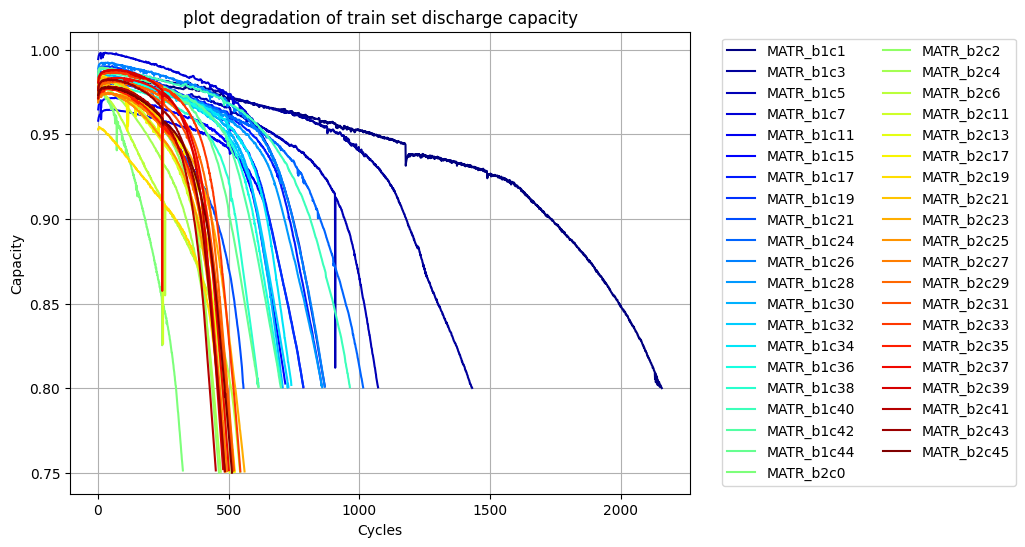

In [10]:
# display (train set) all battery cells' capacity degradation curve using plot_capacity_degradation function

plot_capacity_degradation(train_cells, title='plot degradation of train set discharge capacity', figsize=(8,6), n_legend_cols=2)

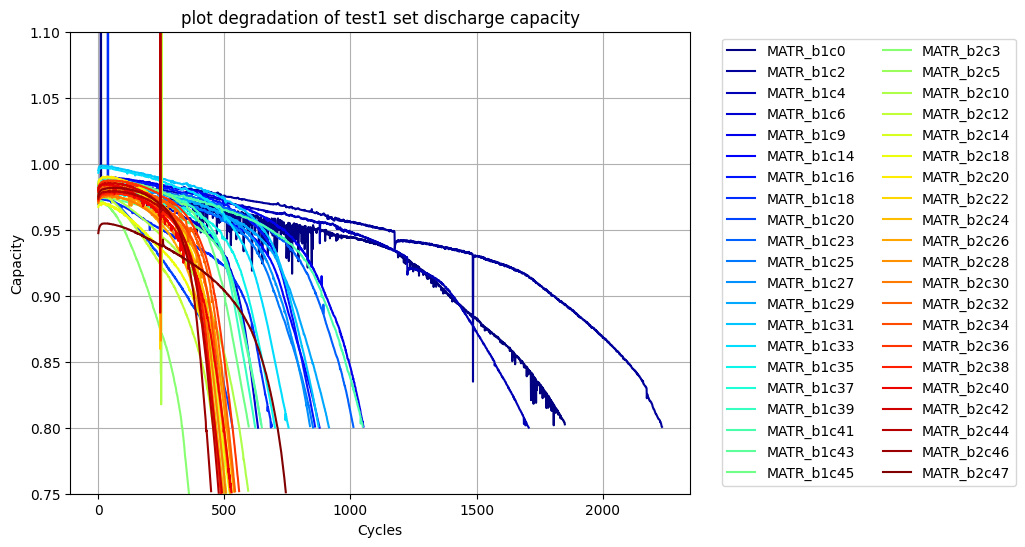

In [11]:
# display (test set) all battery cells' capacity degradation curve using plot_capacity_degradation function

plot_capacity_degradation(test_cells, title='plot degradation of test1 set discharge capacity', figsize=(8,6), n_legend_cols=2, ylim=(0.75,1.1))

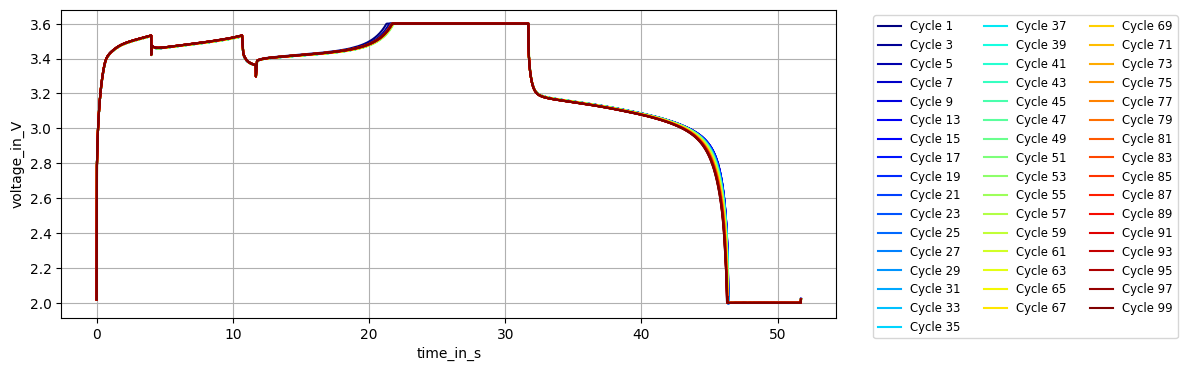

In [12]:
# plot cycle raw attribute such as "voltage_in_V","current_in_A","charge_capacity_in_Ah","discharge_capacity_in_Ah"...

cell_0 = train_cells[10]
indices = [i for i in range(0, 100, 2) if i!=10 ]
plot_cycle_attribute(cell_0.cycle_data, 'voltage_in_V', cycle_indices=indices, figsize=(10, 4))

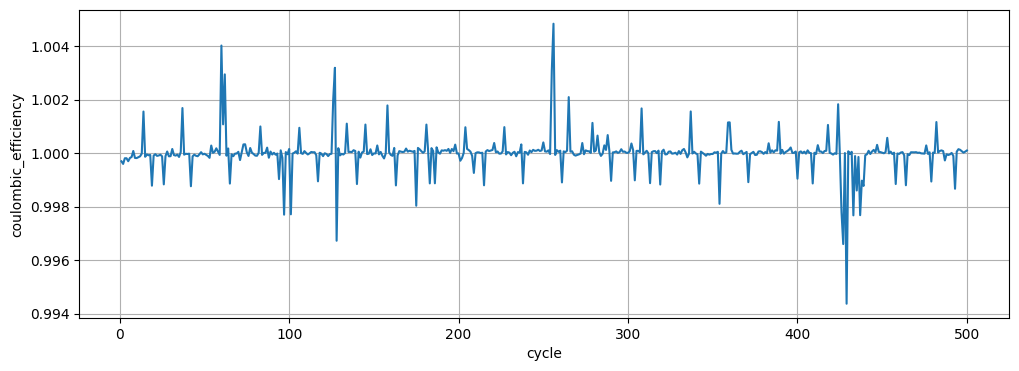

In [13]:
# plot cycle attribute such as "coulombic_efficiency"...
indices = [i for i in range(500) if i!=10 ]
plot_cycle_attribute(cell_0.cycle_data, 'coulombic_efficiency', cycle_indices=indices)

## Plot result

No handles with labels found to put in legend.


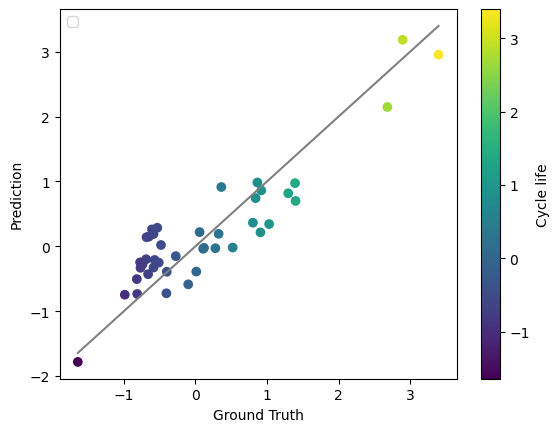

In [22]:
prediction = model.predict(dataset, data_type='test').to('cpu')
ground_truth = dataset.test_data.label.to('cpu')
plot_result(ground_truth, prediction)


# Baseline

In [24]:
import os
import pandas as pd
config_dir = 'configs/baselines/'
data1 = 'matr_1'
data2 = 'matr_2'
result=[]
for method_type in os.listdir(config_dir):
    for method in os.listdir(os.path.join(config_dir, method_type)):
        print(method)
        config_path = os.path.join(config_dir, method_type, method, f'{data1}.yaml')
        pipeline = Pipeline(config_path=config_path,
                    
                    workspace=f'workspaces/{method}')
        # train_loss , test_loss = pipeline.train()
        model, dataset = pipeline.train(device='cuda', skip_if_executed=False)
        train_prediction = model.predict(dataset, data_type='train')
        train_loss = dataset.evaluate(train_prediction, 'RMSE', data_type='train') 
        test_prediction = model.predict(dataset, data_type='test')
        test_loss = dataset.evaluate(test_prediction, 'RMSE', data_type='test')
        
        config_path = os.path.join(config_dir, method_type, method, f'{data2}.yaml')
        pipeline = Pipeline(config_path=config_path,
                    workspace=f'workspaces/{method}')
        model, dataset = pipeline.train(device='cuda', skip_if_executed=False)
        test_prediction = model.predict(dataset, data_type='test')
        test2_loss = dataset.evaluate(test_prediction, 'RMSE', data_type='test')
        result.append([method, train_loss, test_loss, test2_loss])

res = pd.DataFrame(data=result, columns=['method', 'train_RMSE', 'test_RMSE', 'test2_RMSE'])

plsr
Seed is set to 0.


Reading train data:   0%|          | 0/41 [00:00<?, ?it/s]

Extracting features: 100%|██████████| 42/42 [00:00<00:00, 676.66it/s]


Seed is set to 0.


Extracting features: 100%|██████████| 40/40 [00:00<00:00, 765.52it/s]


pcr
Seed is set to 0.


Extracting features: 100%|██████████| 42/42 [00:00<00:00, 726.75it/s]


Seed is set to 0.


Extracting features: 100%|██████████| 40/40 [00:00<00:00, 736.69it/s]


gpr
Seed is set to 0.
Load datasets from cache cache/battery_cache_0ff5ff401e0feff22f54360eae76bc3f.pkl.
Seed is set to 0.
Load datasets from cache cache/battery_cache_c0b1046b77cbeffed9ea29604f446c80.pkl.
full_model
Seed is set to 0.


Reading train data:  44%|████▍     | 18/41 [00:14<00:17,  1.32it/s]

In [12]:
res

,method,train_RMSE,test_RMSE,test2_RMSE
0,discharge_model,79.227928,329.048248,148.582108
1,rf,101.386093,164.312352,231.412681
2,gpr,0.000032,153.927151,223.798726
3,plsr,53.138903,103.652639,180.533886
4,ridge,45.890869,115.789204,183.799726
5,full_model,69.598763,166.798599,1074.400146
6,variance_model,122.053429,136.129623,211.236359
7,pcr,77.822915,90.435303,186.539357
8,dummy,327.207428,398.822876,510.628448
9,cnn,33.624256,76.541603,215.423920
